# Magyar NLP bemutatása
Véleményünk szerint a magyar szövegbányászat és szövegelemzés eszköztára nagyon szegényes volt, de az elmúlt pár évben viszonylag nagy fejlődésen esett át és sok eszköz megjelent hozzá Pythonban is.
<br>
Ebben a fejezetben a Spacy csomagot mutatom be, amely a magyar nyelvű dokumentumok elemzéséhez az egyik legalkalmasabb eszköz jelenleg python környezetben. Ezen felül megmutatok még pár hasznos csomagot is ebben a notebookban.

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

### Csomagok telepítése és importálása

In [ ]:
! pip install https://github.com/oroszgy/spacy-hungarian-models/releases/download/hu_core_ud_lg-0.3.1/hu_core_ud_lg-0.3.1-py3-none-any.whl
! pip install newspaper3k

In [1]:
import hu_core_ud_lg as hu
nlp = hu.load()

C:\Users\molna\anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'hu_core_ud_lg' (0.3.1) requires spaCy v2.1 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


### ----------------------------------------------------------------------------------------------------------------------------------------------------------

### Spacy speaks Hungarian
<br>
A Spacy egy ingyenes, open-source python csomag természetes nyelvfeldolgozáshoz (NLP = Natural Language Processing).
A csomag már tartalmazza a magyar nyelvet is, mivel magyar fejlesztők, többek között Orosz György belefejlesztettek (CNN neurális háló). 
<br>
Spacy Hungarian Models: (https://github.com/oroszgy/spacy-hungarian-models) 
<br>
<br>
A Spacy csomag egyrészt olyan eszközöket nyújt, amelyek segítségével a szövegek és tartalmuk jobban megérthetők. Továbbá olyan adat előfeldolgozási eszközöket is tartalmaz, amelyek nélkülönözhetetlenek a komplexebb NLP alapú modellezésekhez (CBOW, LDA, szentiment analitika, stb).
<br>
<br>
A Spacy - HUN performanciája magyar korpuszon tesztelve (Szeged Business és Criminal korpuszon)


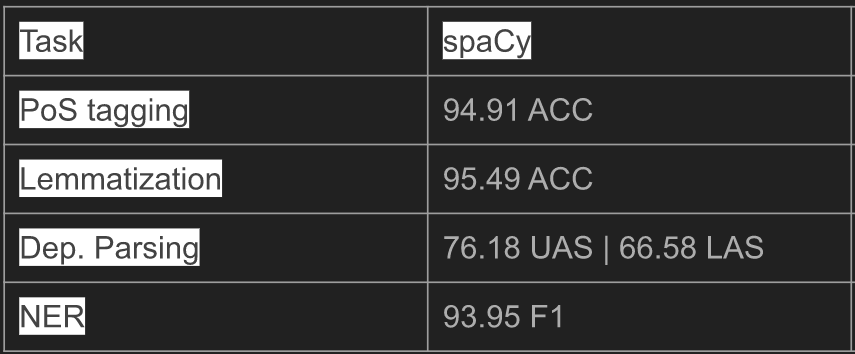

### Spacy - HUN pipeline elemei

In [3]:
nlp.pipeline

[('hun_sentencizer', <hu_core_ud_lg.HunSentencizer at 0x22e7d4c8d08>),
 ('tagger', <spacy.pipeline.pipes.Tagger at 0x22e7d4c8e48>),
 ('hun_lemmatizer', <hu_core_ud_lg.HunLemmatizer at 0x22e7d4c8d88>),
 ('parser', <spacy.pipeline.pipes.DependencyParser at 0x22e7a1593a8>),
 ('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x22e7df1a528>)]

* Sentencizer: A dokumentumokat mondatokra bontja.
* Tagger: Felcímkézi a tokeneket (lemma, pos, stop, dep, stb.).
* Lemmatizer: Visszakeresi a szavak szótári alakját.
* NER: Névelem felismerés

### NLP dokumentum létrehozása

In [42]:
doc = nlp("A 19. percben 1–11-re állt a címvédő Vardar a kézilabda BL-ben")
doc

A 19. percben 1–11-re állt a címvédő Vardar a kézilabda BL-ben

### Spacy - HUN pipeline demo 

In [32]:
print("{0: <16}".format("Text"), "{0: <14}".format("Lemma"), "PoS", "Dep", "{0: <10}".format("Shape"), "Stop", sep="\t| ")
print("-"*110)
for token in doc:
    print(
        "{0: <16}".format(token.text), "{0: <14}".format(token.lemma_), token.pos_, 
        token.dep_,
        "{0: <10}".format(token.shape_), token.is_stop, 
        sep="\t| "
    )

Text            	| Lemma         	| PoS	| Dep	| Shape     	| Stop
--------------------------------------------------------------------------------------------------------------
A               	| a             	| DET	| det	| X         	| True
19.             	| 19.           	| ADJ	| amod	| dd.       	| False
percben         	| perc          	| NOUN	| nmod	| xxxx      	| False
1–11-re         	| 1–11.         	| NOUN	| obj	| d–dd-xx   	| False
állt            	| áll           	| VERB	| ROOT	| xxxx      	| False
a               	| a             	| DET	| det	| x         	| True
címvédő         	| címvédő       	| NOUN	| nmod	| xxxx      	| False
Vardar          	| Vardar        	| PROPN	| nsubj	| Xxxxx     	| False
a               	| a             	| DET	| det	| x         	| True
kézilabda       	| kézilabda     	| NOUN	| nmod	| xxxx      	| False
BL-ben          	| BL            	| NOUN	| nmod	| XX-xxx    	| False


### Kitérő: Névelem felismerés (PoS = Part of Speech tag) elemei

* ADJ: adjective                      - melléknév
* ADV: adverb                         - határozószó
* AUX: auxiliary verb                 - segédige
* CONJ: coordinating conjunction      - koordináló kötőszó
* DET: determiner                     - határozószó
* NOUN: noun                          - főnév
* PRON: pronoun                       - névmás
* PROPN: proper noun                  - tulajdonnév
* VERB: verb                          - ige

### Displacy példa vizualizáció
(A dokumentum dependencia grafikonját rajzolja ki)

In [6]:
from spacy import displacy

displacy.render(doc, style='dep', jupyter=True)

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

### Egyszerű webscrape példa (newspaper python csomag)
A newspaper csomag segítségével egyszerűen gyűjthetünk le az internetről, többek közt cikkeket. 
Egy url megadása után képes leszedni a cikk címét, szövegtörzsét, megjelenés dátumát, kép/videó hivatkozásokat és a szerzőket, tag-eket.
<br>
Newspaper dokumentáció: (https://newspaper.readthedocs.io/en/latest/)

In [82]:
from newspaper import Article

def extract_content(url):
    article = Article(url, language="hu")
    article.download()
    article.parse()
    return "{}\n\n{}\n{}".format(article.title, article.text, article.authors)

In [84]:
doc = nlp(extract_content("https://index.hu/kulfold/2019/10/11/abij_ahmed_ali_nobel_bekedij_nagy_etiop_reneszansz_gat_etiopia_nilus_szudan_egyiptom/"))
doc

A friss Nobel-békedíjas etióp kormányfő a Nílussal hazárdírozik

Etiópia feszített tempóban dolgozik, hogy minél gyorsabban befejezze a Nílus egyik ágára tervezett Nagy Reneszánsz-gátat, ami elektromossággal látná el az infrastruktúrájában meglehetősen elmaradott országot. A tervtől azonban a Nílus alsóbb folyása mentén lévő országok kiakadtak, hiszen ez az ivóvízkészletük megtizedelésével járna. Egyiptomi katonai vezetők már a háborút tervezgették egy időben.

Az oslói Nobel-bizottság pénteken jelentette be, hogy az idei Nobel-békedíjat Abij Ahmed Ali etióp miniszterelnök kapja. A díj indoklása szerint a miniszterelnök sokat tett a békéért, a nemzetközi együttműködésért, és különösen azért, hogy megoldja a határkonfliktust a szomszédos Eritreával. Számos olyan reformot is megindított, amivel sok etiópnak adott reményt egy jobb életre. Miniszterelnökként a megbékélést, a szolidaritást és a társadalmi igazságosságot tartotta szem előtt.

Kérdés, hogy erről a szudániak és főképp az egyip

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

### Névelem felismerés (NER = Named Entity Recognition)
A NER elemzések során a dokumentumokból olyan információkat lehet kinyerni, mint például, hogy milyen tulajdonnevek, földrajzi nevek, szervezetek szerepeltek a szövegben.
<br>
A Spacy nem adja vissza a dokumentum összes tokenjét, csak azokat, amelyeket a NER során kategóriába tud sorolni.
<br>
Az alap modellek, olyan tag-eket használnak, mint például a "PER", "ORG" vagy a "LOC"

#### NER által ismert névelemek
| Típus | Leírás | 
| :-  | :-  | 
| **PER** | Személy neve, családi/utónév |
| **LOC** | Földrajzi helyek (városok, országok, hegyek, stb. |
| **ORG** | Szervezetek, cégek, kormányok nevei |
| **MISC** | Különböző entitások, pl. események, nemzetiségek, termékes, stb. |

**Entitások kigyűjtése és a ner kategóriák meghatározása**

In [87]:
# két üres lista létrehozása
token = []
entit = []
for ent in doc.ents:
    # listához fűzés, feltöltés
    token.append(ent.text)
    entit.append(ent.label_)

# listák szótárrá alakítása
ner = dict(zip(token, entit))
print(ner)

{'Nílussal': 'ORG', 'Etiópia': 'LOC', 'Nílus': 'LOC', 'Nagy Reneszánsz-gátat': 'LOC', 'Egyiptomi': 'LOC', 'Nobel-bizottság': 'ORG', 'Abij Ahmed Ali': 'PER', 'A díj': 'MISC', 'Eritreával': 'MISC', 'Miniszterelnökként': 'ORG', 'Kék-Nílusra épített Nagy Etióp Reneszánsz-gát': 'MISC', 'Elapadó': 'LOC', 'Kartúmban': 'LOC', 'Egyiptom': 'LOC', 'Szudán': 'LOC', 'Reneszánsz-gát környezeti': 'ORG', 'Kairóban': 'LOC', 'Egyesült Államokat': 'LOC', 'Nílusból': 'LOC', 'Etiópiából': 'LOC', 'Kék-Nílus ág': 'LOC', 'Világbank': 'ORG', 'Reneszánsz-gát': 'ORG', 'Kék-Nílusból': 'LOC', 'Egyiptomban': 'LOC', 'Asszuáni-gátat': 'ORG', 'Nílus-gátat': 'LOC', 'Egyiptomnak': 'LOC', 'Elviheti': 'MISC', 'Nemzetközi Bíróságra': 'ORG', 'Etiópiát': 'LOC', 'Kék-Nílus': 'ORG', 'B-terv': 'MISC', 'B-tervvel': 'ORG', 'Kevéssé': 'MISC', 'Muhammad Morszi': 'PER', 'Az értekezleten számos megoldási javaslat felmerült:\n\n': 'MISC', 'Kairó': 'LOC', 'Molnár Csaba': 'PER'}


**Entitások szűrése NER kategória alapján**

In [86]:
PER_ent = {key:value for (key, value) in ner.items() if value == 'PER'}
list(PER_ent.keys())

['Abij Ahmed Ali', 'Muhammad Morszi', 'Molnár Csaba']

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## Keyword extraction
A Textacy textrank() függvénye a PageRank algoritmuson alapszik, amelyet a dokumentumban lévő kulcskifejezések feltárásához használhatunk.
<br>
A PageRank algoritmus-ról bővebben itt olvasható: 
<br>
* (https://towardsdatascience.com/textrank-for-keyword-extraction-by-python-c0bae21bcec0)


In [ ]:
from collections import OrderedDict
import numpy as np
import spacy

In [ ]:
# hungarian stop_words.txt beolvasása:
with open("nlp_utils/stop_words.txt", "r", encoding='utf-8') as f:
    STOP_WORDS = [i for line in f for i in line.split('\n')]
    STOP_WORDS = list(filter(None, STOP_WORDS))

In [35]:
# osztály létrehozása:
class TextRank4Keyword():
    """Extract keywords from text"""
    
    def __init__(self):
        self.d = 0.85 # damping coefficient, usually is .85
        self.min_diff = 1e-5 # convergence threshold
        self.steps = 10 # iteration steps
        self.node_weight = None # save keywords and its weight

    # stopszavak felcímkézése a szótárban
    def set_stopwords(self, stopwords):  
        """Set stop words"""
        for word in STOP_WORDS:
            lexeme = nlp.vocab[word]
            lexeme.is_stop = True
    
    # szöveg mondatokra bontása, szófajok szűrése
    def sentence_segment(self, doc, candidate_pos, lower):
        """Store those words only in cadidate_pos"""
        sentences = []
        for sent in doc.sents:
            selected_words = []
            for token in sent:
                # Store words only with cadidate POS tag
                if token.pos_ in candidate_pos and token.is_stop is False:
                    if lower is True:
                        selected_words.append(token.text.lower())
                    else:
                        selected_words.append(token.text)
            sentences.append(selected_words)
        return sentences
        
    # "szófajszűrt" mondatokból szótár előállítása
    def get_vocab(self, sentences):
        """Get all tokens"""
        vocab = OrderedDict()
        i = 0
        for sentence in sentences:
            for word in sentence:
                if word not in vocab:
                    vocab[word] = i
                    i += 1
        return vocab
    
    # N-grammok előállítása tokenpárokból, N = window size
    def get_token_pairs(self, window_size, sentences):
        """Build token_pairs from windows in sentences"""
        token_pairs = list()
        for sentence in sentences:
            for i, word in enumerate(sentence):
                for j in range(i+1, i+window_size):
                    if j >= len(sentence):
                        break
                    pair = (word, sentence[j])
                    if pair not in token_pairs:
                        token_pairs.append(pair)
        return token_pairs
        
    def symmetrize(self, a):
        return a + a.T - np.diag(a.diagonal())
    
    def get_matrix(self, vocab, token_pairs):
        """Get normalized matrix"""
        # Build matrix
        vocab_size = len(vocab)
        g = np.zeros((vocab_size, vocab_size), dtype='float')
        for word1, word2 in token_pairs:
            i, j = vocab[word1], vocab[word2]
            g[i][j] = 1
            
        # Get Symmeric matrix
        g = self.symmetrize(g)
        
        # Normalize matrix by column
        norm = np.sum(g, axis=0)
        g_norm = np.divide(g, norm, where=norm!=0) # this is ignore the 0 element in norm
        
        return g_norm

    
    def get_keywords(self, number=10):
        """Print top number keywords"""
        node_weight = OrderedDict(sorted(self.node_weight.items(), key=lambda t: t[1], reverse=True))
        for i, (key, value) in enumerate(node_weight.items()):
            print(key + ' - ' + str(value))
            if i > number:
                break
        
        
    def analyze(self, text, 
                candidate_pos=['NOUN', 'PROPN'], 
                window_size=4, lower=False, stopwords=list()):
        """Main function to analyze text"""
        
        # Set stop words
        self.set_stopwords(stopwords)
        
        # Pare text by spaCy
        doc = nlp(text)
        
        # Filter sentences
        sentences = self.sentence_segment(doc, candidate_pos, lower) # list of list of words
        
        # Build vocabulary
        vocab = self.get_vocab(sentences)
        
        # Get token_pairs from windows
        token_pairs = self.get_token_pairs(window_size, sentences)
        
        # Get normalized matrix
        g = self.get_matrix(vocab, token_pairs)
        
        # Initionlization for weight(pagerank value)
        pr = np.array([1] * len(vocab))
        
        # Iteration
        previous_pr = 0
        for epoch in range(self.steps):
            pr = (1-self.d) + self.d * np.dot(g, pr)
            if abs(previous_pr - sum(pr))  < self.min_diff:
                break
            else:
                previous_pr = sum(pr)

        # Get weight for each node
        node_weight = dict()
        for word, index in vocab.items():
            node_weight[word] = pr[index]
        
        self.node_weight = node_weight

In [89]:
doc = extract_content("https://index.hu/kulfold/2019/10/11/abij_ahmed_ali_nobel_bekedij_nagy_etiop_reneszansz_gat_etiopia_nilus_szudan_egyiptom/")

tr4w = TextRank4Keyword()
tr4w.analyze(doc, candidate_pos = ['NOUN', 'PROPN', 'VERB'], window_size=4, lower=False)
tr4w.get_keywords(10)

Egyiptom - 6.372947298370771
Etiópia - 5.126571681828835
országok - 3.788239722174755
Nílus - 3.441852109467096
erőmű - 2.8956095454208364
víz - 2.8221176117239186
köbméter - 2.5610484772389985
gát - 2.5068865898826993
vizet - 2.3816003156618066
etiópiaiak - 2.15157025806977
elrekesztése - 1.9078519781488743
Szudán - 1.8731225666656992
